# Two-sample t-test

### Dataset creation
One dataset has already been created in the one-sample-t code called 'one-sample-t.csv'.

To create our second dataset we need 25 datapoints whose height field has a mean of 159cm, a standard deviation of 3.4cm and follows a normal distribution. 

We’ll use scipy’s truncnorm function to help out with this. Truncnorm helps in creating a truncated normal distribution - a normal distribution with the x-values truncated from below, above or both ends. 

Since we’re dealing with height - a value which obviously can’t be between negative infinity and infinity - we need to set lower and upper boundaries, thus we’re using a truncated normal distribution. 

In [6]:
import scipy.stats as stats

lower, upper = 152.0, 173.0 # set the lower and upper bounds 
mu, sigma = 159.0, 3.40 # set the mean and standard deviation
dist = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma) # call the truncnorm function to create the distribution

values = dist.rvs(25) # get 25 values from our truncated normal distribution

In [2]:
values

array([158.5052038 , 155.7863483 , 159.58138926, 161.67861054,
       155.75106538, 158.05978286, 159.63631667, 168.2565438 ,
       162.87113378, 156.97645741, 157.59942837, 159.34514366,
       159.11083843, 155.987614  , 155.75821384, 152.07879641,
       158.76743302, 155.18652001, 165.59375804, 156.94580702,
       159.45637143, 160.89030153, 158.77877271, 156.59026758,
       155.98389764])

Next we want to assign an age to each height so that we have one more variable. We'll use the random library to generate 25 values between 37 and 40.

In [6]:
import random
ages = [random.randint(37,40) for i in range(25)]

Now we need to combine the ages array and the heights array together to form a dataframe which we can then store in csv for future use.

In [9]:
import pandas as pd
df = pd.DataFrame({'age':ages, 'height':values})
df.to_csv("two-sample-t.csv", index=False)

### Reading and processing the datasets

In [3]:
df_a = pd.read_csv("one-sample-t.csv") # group A
df_b = pd.read_csv("two-sample-t.csv") # group B

In [11]:
df_b.height.mean()

158.60704061997612

The mean of df_b.height isn't exactly 159cm, its 158.6cm. This is due to the fact that 159cm is the mean of the entire distribution (the population) that we created using scipy's truncnorm function, whereas df_b.height is siply a sample from that population. Hence the mean differs slightly.

In [12]:
df_b.height.std()

3.42443022417948

### Checking if df_b.height follows a normal distribution

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

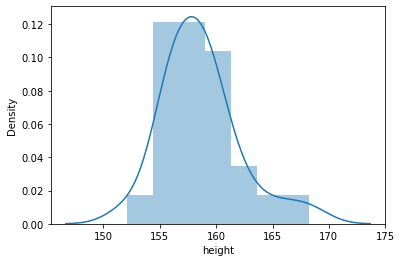

In [4]:
import seaborn as sns
sns.distplot(df_b.height) # plotting a histogram with a curve

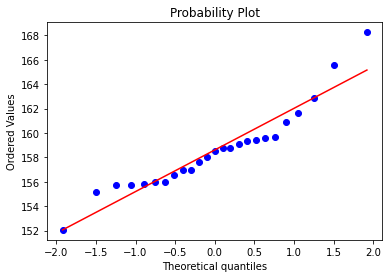

In [7]:
import pylab
stats.probplot(df_b.height, dist="norm", plot=pylab)
pylab.show() # plotting a probability plot

### Performing the t-test

In [11]:
stats.ttest_ind(df_a.height, df_b.height, equal_var=False)

Ttest_indResult(statistic=4.113633648976651, pvalue=0.00017195968508873518)